<a href="https://colab.research.google.com/github/RiyaG20/Deep-Learning/blob/main/CNN_image%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x_train shape: (228, 112, 92, 1)
y_train shape: (228, 20)
x_test shape: (160, 112, 92, 1)
y_test shape: (160, 20)
x_valid shape: (12, 112, 92, 1)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 106, 86, 36)         │           1,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 53, 43, 36)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 49, 39, 54)          │          48,654 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 24, 19, 54)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 24624)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 2024)                │      49,841,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 2024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 1024)                │       2,073,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 20)                  │          10,260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,500,114 (200.27 MB)

 Trainable params: 52,500,114 (200.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/99
4/4 - 7s - 2s/step - accuracy: 0.0570 - loss: 3.2818 - val_accuracy: 0.0000e+00 - val_loss: 2.9921
Epoch 2/99
4/4 - 5s - 1s/step - accuracy: 0.0526 - loss: 2.9943 - val_accuracy: 0.0833 - val_loss: 2.9867
Epoch 3/99
4/4 - 0s - 73ms/step - accuracy: 0.0658 - loss: 2.9850 - val_accuracy: 0.0833 - val_loss: 2.9758
Epoch 4/99
4/4 - 0s - 70ms/step - accuracy: 0.0702 - loss: 2.9607 - val_accuracy: 0.2500 - val_loss: 2.9686
Epoch 5/99
4/4 - 0s - 70ms/step - accuracy: 0.1316 - loss: 2.9077 - val_accuracy: 0.0833 - val_loss: 2.9492
Epoch 6/99
4/4 - 0s - 42ms/step - accuracy: 0.1623 - loss: 2.7947 - val_accuracy: 0.0000e+00 - val_loss: 2.9402
Epoch 7/99
4/4 - 0s - 73ms/step - accuracy: 0.2368 - loss: 2.6250 - val_accuracy: 0.0833 - val_loss: 2.7046
Epoch 8/99
4/4 - 0s - 36ms/step - accuracy: 0.3202 - loss: 2.3513 - val_accuracy: 0.0833 - val_loss: 2.3027
Epoch 9/99
4/4 - 0s - 36ms/step - accuracy: 0.4430 - loss: 1.8079 - val_accuracy: 0.4167 - val_loss: 1.7282
Epoch 10/99
4/4 - 0s - 3

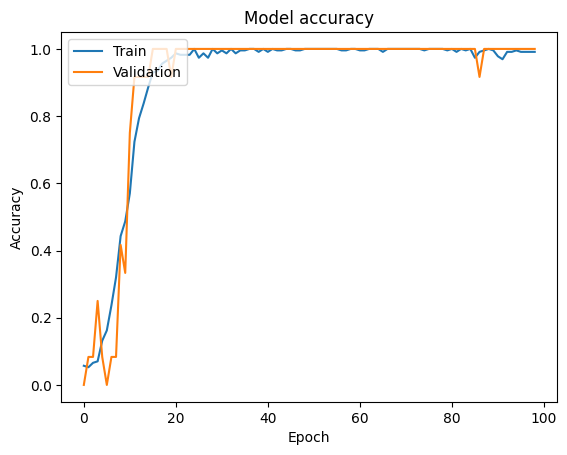

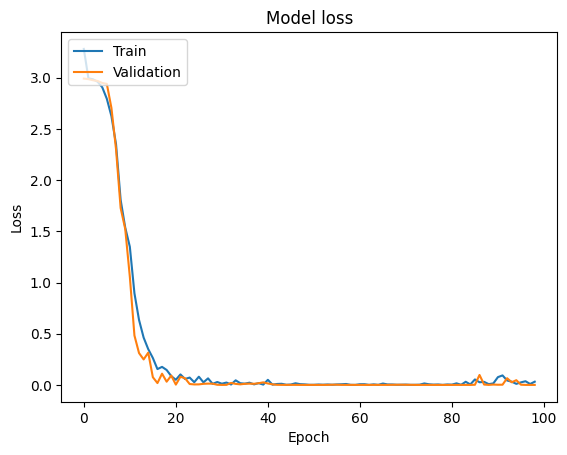

In [10]:





import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.utils import to_categorical

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from tensorflow.keras import utils
import itertools

# Load dataset
data = np.load('ORL_faces.npz')

# Load the "Train Images"
x_train = data['trainX']
x_train = np.array(x_train, dtype='float32') / 255  # Normalize every image

x_test = data['testX']
x_test = np.array(x_test, dtype='float32') / 255

# Load the Label of Images
y_train = data['trainY']
y_test = data['testY']

# Split train data into training and validation
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, test_size=0.05, random_state=1234)

# Image dimensions
im_rows = 112
im_cols = 92
batch_size = 512
im_shape = (im_rows, im_cols, 1)

# Reshape the data for CNN input
x_train = x_train.reshape(-1, *im_shape)
x_test = x_test.reshape(-1, *im_shape)
x_valid = x_valid.reshape(-1, *im_shape)

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, 20)  # 20 is the number of output classes
y_test = to_categorical(y_test, 20)
y_valid = to_categorical(y_valid, 20)

# Display shapes for verification
print('x_train shape: {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('y_test shape: {}'.format(y_test.shape))
print('x_valid shape: {}'.format(x_valid.shape))

# Build CNN model
cnn_model = Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu'),  # No input_shape here
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(20, activation='softmax')  # 20 classes for the output
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Display the model summary
cnn_model.summary()

# Train the model
history = cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=64,
    epochs=99, verbose=2,
    validation_data=(np.array(x_valid), np.array(y_valid)),
)

# Evaluate the model on the test set
score = cnn_model.evaluate(np.array(x_test), np.array(y_test), verbose=0)
print('Test loss: {:.4f}'.format(score[0]))
print('Test accuracy: {:.4f}'.format(score[1]))

# Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
